In [71]:
import pandas as pd
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline  

import numpy as np

# import LinearRregression !
from sklearn.linear_model import LinearRegression

In [12]:
plt.rcParams['axes.unicode_minus'] = False
if platform.system() =='Darwin':
    rc('font',family='AppleGothic')
elif platform.system() =='Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unknown system... sorry~~')

## load 연봉 데이터

In [7]:
Money =pd.read_excel('프로야구 연봉.xlsx', encoding='urf-8')
Money.head()

,이름,소속팀,포지션,순위,국내 선수 연봉(만원),WAR,WPA,ERA,WHIP,WOBA
0,이대호,롯데,내야수,1,250000,3.84,4.34,NaN,NaN,0.415
1,양현종,KIA,투수,2,230000,5.17,-1.06,4.15,1.31,NaN
2,헥터 노에시,KIA,투수,3,190400,2.92,-1.24,4.60,1.41,NaN
3,메릴 켈리,SK,투수,4,156800,3.86,-0.45,4.09,1.26,NaN
4,조쉬 린드블럼,두산,투수,5,151200,6.76,2.06,2.88,1.07,NaN


Text(0.5, 1.0, '연봉 상위 30')

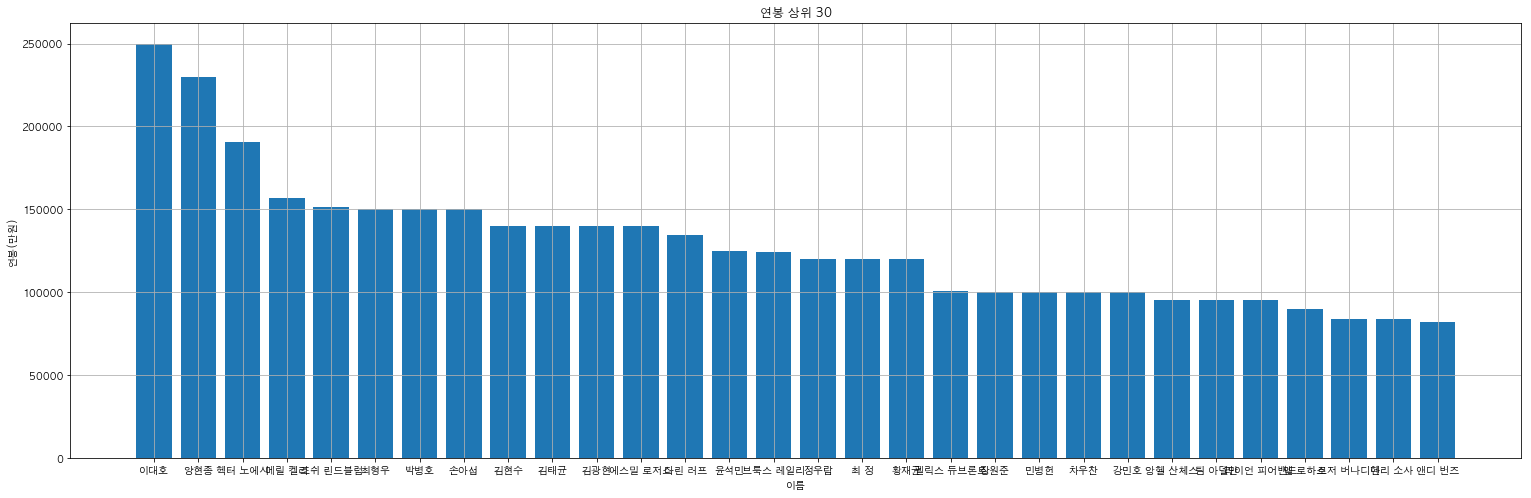

In [13]:
plt.figure(figsize=(26,8))
plt.bar(Money['이름'][:30], Money['국내 선수 연봉(만원)'][:30])
plt.xlabel('이름')
plt.ylabel('연봉(만원)')
plt.grid()
plt.title('연봉 상위 30')

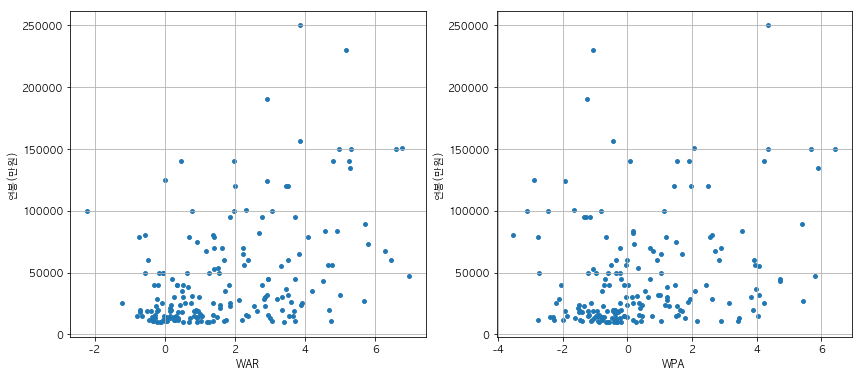

In [23]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.scatter(Money['WAR'], Money['국내 선수 연봉(만원)'], s=15)
plt.xlabel('WAR')
plt.ylabel('연봉(만원)')
plt.grid()
plt.subplot(122)
plt.scatter(Money['WPA'], Money['국내 선수 연봉(만원)'], s=15)
plt.xlabel('WPA')
plt.ylabel('연봉(만원)')
plt.grid()

## WAR로 연봉을 예측!

### Model: Y = a X + b

In [80]:
X = Money[['WAR']]
Y = Money[['국내 선수 연봉(만원)']]
lin_reg = LinearRegression()  # You may see a warning on OSX. But, it's OK. (https://github.com/scipy/scipy/issues/5998)
lin_reg.fit(X, Y)
lin_reg.intercept_, lin_reg.coef_

(array([27918.32227962]), array([[10113.87308789]]))

1530442307.4754577


Text(0.5, 1.0, 'MSE=1530442307.4754577')

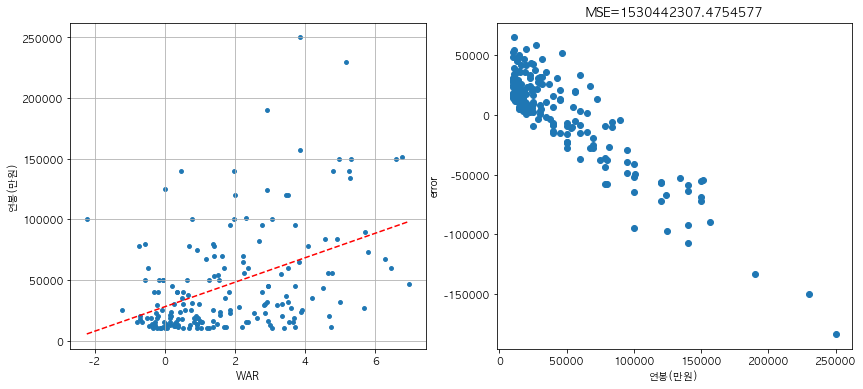

In [81]:
# 예측 시도

Y_pred = lin_reg.predict(X)  # predict
error = Y_pred-Y
mse = np.mean(error**2)
print(mse[0])


X_lim = [X.min(), X.max()]
Y_lim_pred = lin_reg.predict(X_lim)  # predict

plt.figure(figsize=(14,6))

plt.subplot(121)
plt.scatter(Money['WAR'], Money['국내 선수 연봉(만원)'], s=15)
plt.plot(X_lim, Y_lim_pred, 'r--')

plt.xlabel('WAR')
plt.ylabel('연봉(만원)')
plt.grid()

plt.subplot(122)
plt.plot(Y, error,'o')
plt.xlabel('연봉(만원)')
plt.ylabel('error')
plt.title('MSE={}'.format(mse[0]))



**Simple liear model with WAR fails!**

## WPA로 연봉 예측

In [84]:
X = Money[['WPA']]
Y = Money[['국내 선수 연봉(만원)']]
lin_reg = LinearRegression()  # You may see a warning on OSX. But, it's OK. (https://github.com/scipy/scipy/issues/5998)
lin_reg.fit(X, Y)
lin_reg.intercept_, lin_reg.coef_

(array([43632.09298526]), array([[5214.86472805]]))

1785186590.2120457


Text(0.5, 1.0, 'MSE=1785186590.2120457')

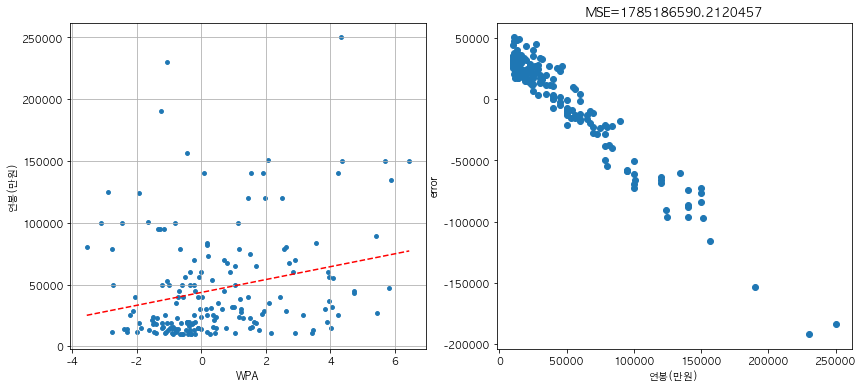

In [85]:
# 예측 시도

Y_pred = lin_reg.predict(X)  # predict
error = Y_pred-Y
mse = np.mean(error**2)
print(mse[0])


X_lim = [X.min(), X.max()]
Y_lim_pred = lin_reg.predict(X_lim)  # predict

plt.figure(figsize=(14,6))

plt.subplot(121)
plt.scatter(Money['WPA'], Money['국내 선수 연봉(만원)'], s=15)
plt.plot(X_lim, Y_lim_pred, 'r--')

plt.xlabel('WPA')
plt.ylabel('연봉(만원)')
plt.grid()

plt.subplot(122)
plt.plot(Y, error,'o')
plt.xlabel('연봉(만원)')
plt.ylabel('error')
plt.title('MSE={}'.format(mse[0]))




**still, large error**

## Use WAR and WPA!

In [86]:
X = Money[['WAR','WPA']]
Y = Money[['국내 선수 연봉(만원)']]
lin_reg = LinearRegression()  # You may see a warning on OSX. But, it's OK. (https://github.com/scipy/scipy/issues/5998)
lin_reg.fit(X, Y)
lin_reg.intercept_, lin_reg.coef_

(array([25456.44618014]), array([[12193.5787793 , -2778.48655484]]))

1514387806.866838


Text(0.5, 1.0, 'MSE=1514387806.866838')

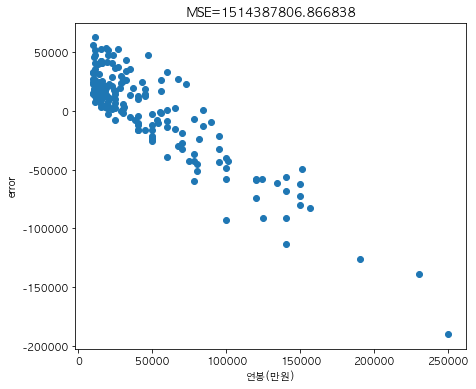

In [89]:
# 예측 시도

Y_pred = lin_reg.predict(X)  # predict
error = Y_pred-Y
mse = np.mean(error**2)
print(mse[0])


plt.figure(figsize=(7,6))

plt.plot(Y, error,'o')
plt.xlabel('연봉(만원)')
plt.ylabel('error')
plt.title('MSE={}'.format(mse[0]))

**little improvement**

# Next, quadratic mode
## Y= a X^2 + b X + c

In [94]:
Money['WAR_sqr'] = Money['WAR']**2

X = Money[['WAR_sqr','WAR']]
Y = Money[['국내 선수 연봉(만원)']]
lin_reg = LinearRegression()  # You may see a warning on OSX. But, it's OK. (https://github.com/scipy/scipy/issues/5998)
lin_reg.fit(X, Y)
lin_reg.intercept_, lin_reg.coef_

(array([30251.52352777]), array([[1273.961881  , 3981.64129923]]))

1504670104.3876061


Text(0.5, 1.0, 'MSE=1504670104.3876061')

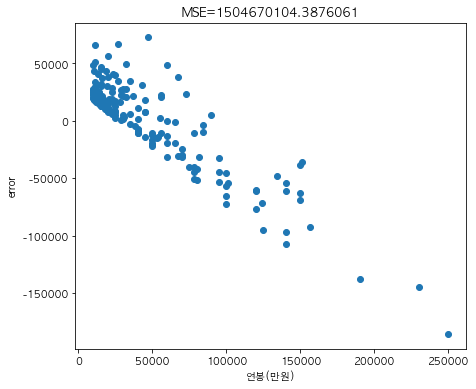

In [95]:
# 예측 시도

Y_pred = lin_reg.predict(X)  # predict
error = Y_pred-Y
mse = np.mean(error**2)
print(mse[0])


plt.figure(figsize=(7,6))

plt.plot(Y, error,'o')
plt.xlabel('연봉(만원)')
plt.ylabel('error')
plt.title('MSE={}'.format(mse[0]))

In [96]:
Money['WPA_sqr'] = Money['WPA']**2

X = Money[['WPA_sqr','WPA']]
Y = Money[['국내 선수 연봉(만원)']]
lin_reg = LinearRegression()  # You may see a warning on OSX. But, it's OK. (https://github.com/scipy/scipy/issues/5998)
lin_reg.fit(X, Y)
lin_reg.intercept_, lin_reg.coef_

(array([37601.51802779]), array([[1926.89419153,  272.06775477]]))

1689035484.866267


Text(0.5, 1.0, 'MSE=1689035484.866267')

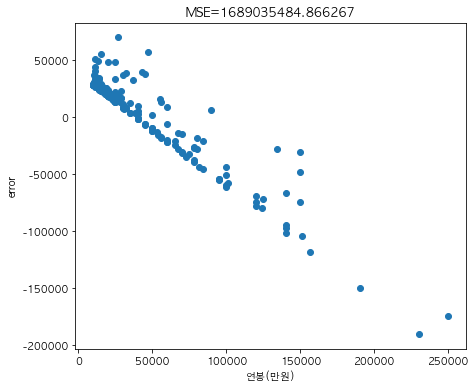

In [97]:
# 예측 시도

Y_pred = lin_reg.predict(X)  # predict
error = Y_pred-Y
mse = np.mean(error**2)
print(mse[0])


plt.figure(figsize=(7,6))

plt.plot(Y, error,'o')
plt.xlabel('연봉(만원)')
plt.ylabel('error')
plt.title('MSE={}'.format(mse[0]))

In [98]:
X = Money[['WAR_sqr','WAR','WPA_sqr','WPA']]
Y = Money[['국내 선수 연봉(만원)']]
lin_reg = LinearRegression()  # You may see a warning on OSX. But, it's OK. (https://github.com/scipy/scipy/issues/5998)
lin_reg.fit(X, Y)
lin_reg.intercept_, lin_reg.coef_

(array([23273.43615379]),
 array([[  587.95258599,  8815.88400443,  1312.36533421, -5855.28576935]]))

1450644040.621287


Text(0.5, 1.0, 'MSE=1450644040.621287')

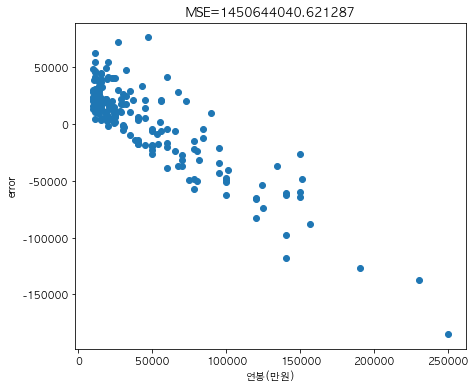

In [99]:
# 예측 시도

Y_pred = lin_reg.predict(X)  # predict
error = Y_pred-Y
mse = np.mean(error**2)
print(mse[0])


plt.figure(figsize=(7,6))

plt.plot(Y, error,'o')
plt.xlabel('연봉(만원)')
plt.ylabel('error')
plt.title('MSE={}'.format(mse[0]))

# TODO: 다양한 시도하기